In [2]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Dict, List, Any

## Pre-processing Data

In [3]:
def save_array(array, folder, filename):
    """
    Save a NumPy array to a specified folder with a given filename.
    If the folder does not exist, it is created.
    If the filename already exists, a counter is appended to the filename.

    Parameters:
    - array (np.ndarray): The NumPy array to save.
    - folder (str): The name of the target folder.
    - filename (str): The desired filename (with extension, e.g., 'data.npy').

    Returns:
    - saved_path (str): The path where the array was saved.
    """
    # Ensure the folder exists; if not, create it
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"Folder '{folder}' created.")

    # Split filename into name and extension
    name, ext = os.path.splitext(filename)
    if not ext:
        # Default to .npy if no extension provided
        ext = '.npy'
        filename = name + ext

    # Construct the full path
    full_path = os.path.join(folder, filename)

    # Save the array
    try:
        np.save(full_path, array)
        print(f"Array saved to '{full_path}'.")
    except Exception as e:
        print(f"An error occurred while saving the array: {e}")
        return None

    return full_path

#### Loading Data (Learning on unitary class)

In [ ]:
n_list = [3,4,5,6,7,8]

pauli_acc = [0.934, 0.967, 0.994, 0.998, 1.0, 1.0]
pauli_acc_std = [0.023, 0.013, 0.009, 0.002, 0.0, 0.0]

uhermitian_acc = [0.927, 0.985, 0.992, 0.999, 1.0, 1.0]
uhermitian_acc_std = [0.013, 0.007, 0.004, 0.001, 0.0, 0.0]

diag_acc = [0.9522, 0.9936, 0.9972, 0.9998, 1.0, 1.0]
diag_acc_std = [0.00363, 0.00344, 0.00271, 0.0006, 0.0003, 0.0]

# diag_acc = [0.915, 0.946, 0.988, 0.989, 1.0, 1.0]
# diag_acc_std = [0.03, 0.019, 0.01, 0.01, 0.0, 0.0]

## Plot (Accuracy vs. n)

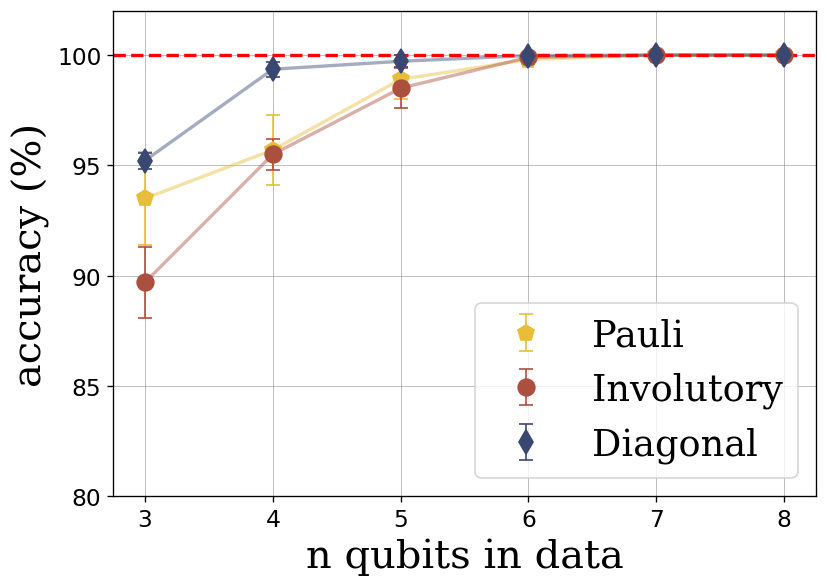

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fig = plt.figure(figsize=(7,5), dpi=120)

black = '#000000'
C0 = '#384871'
C1 = '#E7BD39'
C2 = '#AB4F3F'
C3 = '#47855A'

linewidth = 2.0
markersize = 10.0

# Customize title, x-label, and y-label fonts and sizes
label_font = {'fontsize': 20, 'fontname': 'serif'}

x_data = np.array(n_list) 
# + np.ceil(np.log2(n_datalist))

plt.gca() 
plt.errorbar(x_data, pauli_acc, yerr=pauli_acc_std, fmt="p", markersize=markersize, ecolor=C1, elinewidth=1, capsize=4, color = C1, linewidth = linewidth, label='Pauli')
plt.plot(x_data, pauli_acc, color = C1, linewidth = linewidth)

plt.errorbar(x_data, uhermitian_acc, yerr=uhermitian_acc_std, fmt="o", markersize=markersize, ecolor=C2, elinewidth=1, capsize=4, color = C2, linewidth = linewidth, label='Involutory')
plt.plot(x_data, uhermitian_acc, color = C2, linewidth = linewidth)

plt.errorbar(x_data, diag_acc, yerr=diag_acc_std, fmt="d", markersize=markersize, ecolor=C0, elinewidth=1, capsize=4, color = C0, linewidth = linewidth, label='Diagonal')
plt.plot(x_data, diag_acc, color = C0, linewidth = linewidth)

plt.plot([2.75] + n_list + [8.25], np.ones(len(x_data) + 2), '--', color = 'red', linewidth = linewidth)

plt.xlabel("n qubits in data", **label_font)
plt.ylabel(r'accuracy (%)', **label_font)
# plt.xlim([1,10])
plt.ylim([0.8, 1.02])
plt.yticks([0.8,0.85,0.9,0.95,1.0], [80,85,90,95,100], fontsize=14)
plt.xlim([2.75, 8.25])
plt.xticks([3,4,5,6,7,8], fontsize=14)
plt.legend(prop={'size': 18, 'family': 'serif'})
# plt.yscale('log')
plt.grid(True, which='both', linestyle='-', linewidth=0.3, color='gray')
plt.tight_layout()
# Save the figure as a PDF file with the specified DPI
plt.savefig('./acc_vs_n/acc_vs_n.png', format='png', dpi=600)
plt.show()

## Plot (acc vs. slot)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [10]:
n_slot = [1,2,3,4,5,6,7,8]

acc_data = np.array([[0.4800, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7620, 0.7640, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4880, 0.7620, 0.7620, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4900, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4880, 0.7620, 0.7640, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4840, 0.7620, 0.7620, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7620, 0.7660, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4860, 0.7620, 0.7620, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4820, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7620, 0.7640, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7600, 0.7640, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7620, 0.7620, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4820, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4820, 0.7640, 0.7620, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4900, 0.7620, 0.7640, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7620, 0.7640, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.5020, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4880, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4800, 0.7620, 0.7600, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
                    [0.4820, 0.7620, 0.7680, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])

acc_mean = np.mean(acc_data, axis=0)

acc_classical = np.array([[0.494, 0.736, 0.728, 0.934, 0.894, 0.888, 0.86, 0.85],
                            [0.494, 0.748, 0.73, 0.93, 0.894, 0.872, 0.858, 0.838],
                            [0.531, 0.748, 0.71, 0.924, 0.892, 0.872, 0.866, 0.818],
                            [0.504, 0.728, 0.718, 0.906, 0.894, 0.886, 0.86, 0.834],
                            [0.494, 0.726, 0.728, 0.922, 0.904, 0.978, 0.81, 0.87],
                            [0.494, 0.711, 0.732, 0.914, 0.894, 0.892, 0.903, 0.91],
                            [0.531, 0.748, 0.71, 0.934, 0.942, 0.972, 0.836, 0.868],
                            [0.508, 0.768, 0.728, 0.916, 0.914, 0.888, 0.876, 0.934],
                            [0.492, 0.716, 0.728, 0.934, 0.898, 0.87, 0.91, 0.89],
                            [0.481, 0.748, 0.731, 0.934, 0.919, 0.882, 0.925, 0.888],
                            [0.531, 0.718, 0.745, 0.924, 0.898, 0.902, 0.876, 0.898],
                            [0.514, 0.762, 0.718, 0.916, 0.974, 0.896, 0.934, 0.884],
                            [0.494, 0.736, 0.745, 0.954, 0.914, 0.989, 0.914, 0.888],
                            [0.494, 0.748, 0.73, 0.93, 0.887, 0.872, 0.858, 0.838],
                            [0.531, 0.728, 0.71, 0.924, 0.942, 0.972, 0.866, 0.818],
                            [0.504, 0.718, 0.728, 0.906, 0.894, 0.902, 0.91, 0.884],
                            [0.492, 0.736, 0.718, 0.934, 0.894, 0.888, 0.86, 0.85],
                            [0.494, 0.768, 0.73, 0.934, 0.914, 0.972, 0.958, 0.888],
                            [0.531, 0.748, 0.71, 0.914, 0.894, 0.872, 0.896, 0.888],
                            [0.504, 0.711, 0.732, 0.954, 0.974, 0.886, 0.906, 0.91]])

acc_mean_classical = np.mean(acc_classical, axis=0)

acc_err_low = acc_mean - np.min(acc_data, axis=0)
acc_err_high = np.max(acc_data, axis=0) - acc_mean

acc_err_low_class = acc_mean_classical - np.min(acc_classical, axis=0)
acc_err_high_class = np.max(acc_classical, axis=0) - acc_mean_classical

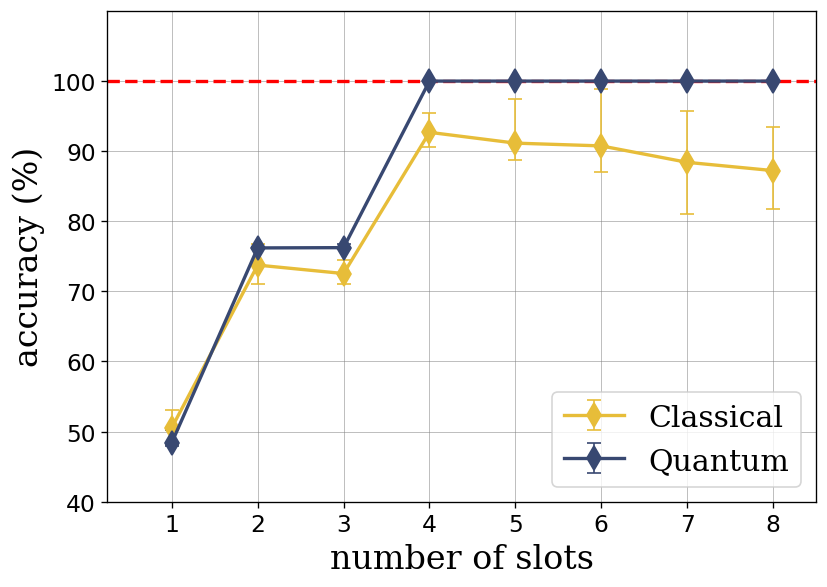

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fig = plt.figure(figsize=(7,5), dpi=120)

black = '#000000'
C0 = '#384871'
C1 = '#E7BD39'
C2 = '#AB4F3F'
C3 = '#47855A'

linewidth = 2.0
markersize = 10.0

# Customize title, x-label, and y-label fonts and sizes
label_font = {'fontsize': 20, 'fontname': 'serif'}

x_data = np.array(n_slot) 
# + np.ceil(np.log2(n_datalist))

plt.gca() 
plt.errorbar(x_data, acc_mean_classical, yerr=np.row_stack([acc_err_low_class, acc_err_high_class]), fmt="-d", markersize=markersize, ecolor=C1, elinewidth=1, capsize=4, color = C1, linewidth = linewidth, label='Classical')
plt.errorbar(x_data, acc_mean, yerr=np.row_stack([acc_err_low, acc_err_high]), fmt="-d", markersize=markersize, ecolor=C0, elinewidth=1, capsize=4, color = C0, linewidth = linewidth, label='Quantum')

# plt.plot(x_data, pauli_acc, alpha = 0.45, color = C1, linewidth = linewidth)

plt.plot([0.25] + n_slot + [8.5], np.ones(len(x_data) + 2), '--', color = 'red', linewidth = linewidth)

plt.xlabel("number of slots", **label_font)
plt.ylabel(r'accuracy (%)', **label_font)
# plt.xlim([1,10])
plt.ylim([0.4, 1.1])
plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], [40, 50, 60, 70, 80, 90, 100], fontsize=14)
plt.xlim([0.25, 8.5])
plt.xticks([1,2,3,4,5,6,7,8], fontsize=14)
plt.legend(prop={'size': 18, 'family': 'serif'})
# plt.yscale('log')
plt.grid(True, which='both', linestyle='-', linewidth=0.3, color='gray')
plt.tight_layout()
# Save the figure as a PDF file with the specified DPI
plt.savefig('./acc_vs_n/acc_vs_slot.png', format='png', dpi=600)
plt.show()